# Event-wise Energy Deposition

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Cosmic Background

In [2]:
cosmicFile = '/Users/yuntse/data/coherent/preLArTPC/analysis/evt/cosmicEvt.csv'
cosmic = pd.read_csv( cosmicFile )

### Number of events with cosmic and cosmic-induced particles traversing the LArTPC

In [3]:
cosmic

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
0,0,165,0.153584,0.153584,0.082469,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,0,229,9.060710,2.495953,5.956722,62.362895,62.362895,343.563160,0.0,0.0,0.0,0.0,0.0,0.0,0.009619,0.003206,27.355899,0.0,0.0,0.0
2,0,238,14.324911,2.517551,8.184814,50.643010,50.643010,285.520670,0.0,0.0,0.0,0.0,0.0,0.0,0.006739,0.003206,12.855388,0.0,0.0,0.0
3,0,331,0.159523,0.127416,0.060342,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000327,0.000327,37.706869,0.0,0.0,0.0
4,0,384,0.507793,0.266854,0.201996,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.003206,0.003206,23.384922,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7370,998,732,13.572289,2.513901,6.757480,117.146117,117.146117,632.300393,0.0,0.0,0.0,0.0,0.0,0.0,0.006413,0.003206,265.301447,0.0,0.0,0.0
7371,998,934,0.557835,0.557835,0.639155,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
7372,999,270,0.279450,0.116976,0.052229,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.003206,0.003206,7.693221,0.0,0.0,0.0
7373,999,292,6.066458,2.914196,9.233855,17.924390,17.924390,93.731233,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,10.851956,0.0,0.0,0.0


7375 out of 1M cosmogenic events have energy deposition in the LArTPC.  0.7% \
That said, 0.7% of the neutrino events will have cosmogenic pile-up - negligible.

### Number of events with at least a muon

In [4]:
cosmic[cosmic.muMaxLength>0.]

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
1,0,229,9.060710,2.495953,5.956722,62.362895,62.362895,343.563160,0.0,0.0,0.0,0.0,0.0,0.0,0.009619,0.003206,27.355899,0.0,0.0,0.0
2,0,238,14.324911,2.517551,8.184814,50.643010,50.643010,285.520670,0.0,0.0,0.0,0.0,0.0,0.0,0.006739,0.003206,12.855388,0.0,0.0,0.0
6,0,547,54.047305,15.435239,63.327678,123.099428,123.099428,644.217679,0.0,0.0,0.0,0.0,0.0,0.0,0.038476,0.003206,218.176630,0.0,0.0,0.0
7,0,663,6.524323,2.862063,4.895851,16.250693,16.250693,89.895482,0.0,0.0,0.0,0.0,0.0,0.0,0.006413,0.003206,47.456984,0.0,0.0,0.0
9,0,781,11.852611,1.624243,3.223183,109.190267,109.190267,574.341904,0.0,0.0,0.0,0.0,0.0,0.0,0.009648,0.003206,17.780699,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7367,997,737,12.001098,3.426128,7.539809,33.004714,33.004714,176.367225,0.0,0.0,0.0,0.0,0.0,0.0,0.006442,0.003206,0.238057,0.0,0.0,0.0
7369,998,22,1.782200,0.990825,1.227895,2.179947,2.179947,12.559690,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
7370,998,732,13.572289,2.513901,6.757480,117.146117,117.146117,632.300393,0.0,0.0,0.0,0.0,0.0,0.0,0.006413,0.003206,265.301447,0.0,0.0,0.0
7373,999,292,6.066458,2.914196,9.233855,17.924390,17.924390,93.731233,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,10.851956,0.0,0.0,0.0


4400 events have at least a muon track out of 1M events simulated.  That means 0.44%.

### Number of events with a muon and the muon is shorter than 5cm in the TPC

In [5]:
cosmic[(cosmic.muMaxLength<50)&(cosmic.muMaxLength>0)]

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
48,7,890,1.369763,0.459033,2.075510,7.766749,7.766749,41.219075,0.0,0.0,0.0,0.0,0.0,0.0,0.009619,0.003206,191.494992,0.0,0.0,0.0
54,9,378,1.201940,0.786521,0.742135,6.711519,6.711519,29.912116,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
81,12,978,7.082413,3.704506,10.326460,8.757969,8.757969,46.388348,0.0,0.0,0.0,0.0,0.0,0.0,0.003533,0.003206,118.743755,0.0,0.0,0.0
84,13,540,3.564111,1.743373,3.608947,9.616277,9.616277,49.190516,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,33.248579,0.0,0.0,0.0
103,15,862,1.199543,0.516458,0.599407,7.047609,7.047609,37.147828,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7341,993,991,4.236792,1.739312,2.966871,3.664694,3.664694,18.512977,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
7342,994,62,0.677035,0.339399,0.291821,3.638845,3.638845,20.290882,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
7344,994,538,2.071699,1.057537,1.091331,6.437290,6.437290,32.388994,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
7347,995,97,1.437706,0.968303,1.567507,1.334115,1.334115,8.161383,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0


We should be able to identify a muon and reject the event if the muon track is longer than 5cm. \
0.0332% of cosmic events have a muon track shorter than 5cm in the LArTPC.

### Number of events with either no muon or muons shorter than 5cm

In [6]:
cosmic[(cosmic.muMaxLength<50)]

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
0,0,165,0.153584,0.153584,0.082469,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,0,331,0.159523,0.127416,0.060342,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000327,0.000327,37.706869,0.0,0.0,0.0
4,0,384,0.507793,0.266854,0.201996,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.003206,0.003206,23.384922,0.0,0.0,0.0
5,0,509,0.228477,0.105125,0.043559,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.003206,0.003206,98.947220,0.0,0.0,0.0
8,0,749,0.562273,0.420683,0.408376,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,51.077120,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7366,997,382,14.504519,7.561963,21.672104,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.012825,0.003206,212.023662,0.0,0.0,0.0
7368,997,933,1.991142,1.694014,2.941866,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.003206,0.003206,114.766754,0.0,0.0,0.0
7369,998,22,1.782200,0.990825,1.227895,2.179947,2.179947,12.55969,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
7371,998,934,0.557835,0.557835,0.639155,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0


3307 out of 1M cosmogenic events have either no muons or muons shorter than 5cm.  0.33%

### Muon length in the LArTPC

In [7]:
cosmic.muMaxLength.max()

806.7939194986527

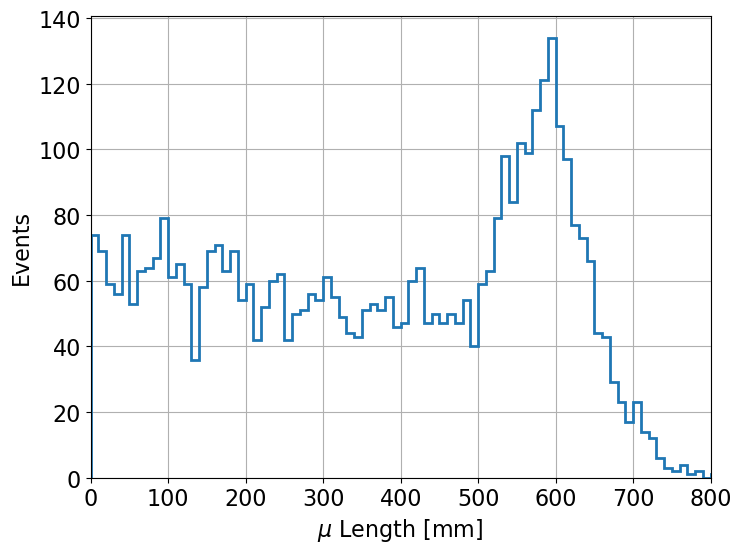

In [8]:
fig, ax = plt.subplots( figsize = (8, 6) )  

ax.hist(cosmic[(cosmic.muMaxLength>0)].muMaxLength, bins = np.linspace(0, 810, 82), histtype = 'step', lw = 2)
ax.set_xlabel( r'$\mu$ Length [mm]', fontsize = 16 )
ax.set_ylabel( r'Events', fontsize = 16 )
ax.tick_params(axis = 'x', labelsize = 16)
ax.tick_params(axis = 'y', labelsize = 16)
ax.set_xlim( [0, 800])

ax.grid(":")
fig.savefig('CosmicMuonLength.pdf')

### Electron energy deposition in LArTPC

#### All electrons

In [9]:
cosmic[cosmic.eTotalE>0.]

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
0,0,165,0.153584,0.153584,0.082469,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,0,229,9.060710,2.495953,5.956722,62.362895,62.362895,343.563160,0.0,0.0,0.0,0.0,0.0,0.0,0.009619,0.003206,27.355899,0.0,0.0,0.0
2,0,238,14.324911,2.517551,8.184814,50.643010,50.643010,285.520670,0.0,0.0,0.0,0.0,0.0,0.0,0.006739,0.003206,12.855388,0.0,0.0,0.0
3,0,331,0.159523,0.127416,0.060342,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000327,0.000327,37.706869,0.0,0.0,0.0
4,0,384,0.507793,0.266854,0.201996,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.003206,0.003206,23.384922,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7370,998,732,13.572289,2.513901,6.757480,117.146117,117.146117,632.300393,0.0,0.0,0.0,0.0,0.0,0.0,0.006413,0.003206,265.301447,0.0,0.0,0.0
7371,998,934,0.557835,0.557835,0.639155,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
7372,999,270,0.279450,0.116976,0.052229,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.003206,0.003206,7.693221,0.0,0.0,0.0
7373,999,292,6.066458,2.914196,9.233855,17.924390,17.924390,93.731233,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,10.851956,0.0,0.0,0.0


In [10]:
cosmic.eMaxE.max()

108.31938886393446

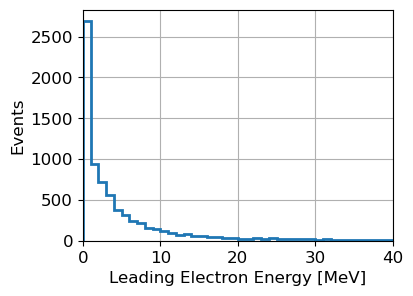

In [11]:
fig, ax = plt.subplots( figsize = (4, 3) )  

ax.hist(cosmic.eMaxE, bins = np.linspace(0, 40, 41), histtype = 'step', lw = 2)
ax.set_xlabel( r'Leading Electron Energy [MeV]', fontsize = 12 )
ax.set_ylabel( r'Events', fontsize = 12 )
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)
ax.set_xlim( [0, 40])

ax.grid(":")
fig.savefig('CosmicAlleMaxE.pdf')

In [12]:
cosmic[cosmic.eMaxE>40.]

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
38,6,47,223.466870,41.304277,177.331632,53.582266,53.582266,275.835189,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.160968,0.003206,419.585576,0.0,0.0,0.0
98,15,310,116.617386,46.965361,217.525940,112.508147,112.508147,612.018900,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.091082,0.003206,410.845177,0.0,0.0,0.0
282,37,847,69.364069,43.517075,184.004789,113.110919,113.110919,598.058219,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.035596,0.003206,179.411597,0.0,0.0,0.0
287,38,738,169.599588,74.151995,381.653016,115.518190,115.518190,618.796930,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.129806,0.003206,483.377088,0.0,0.0,0.0
298,40,77,147.837695,42.873684,189.587127,111.925503,111.925503,597.883786,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.107114,0.003206,352.848968,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6392,863,428,114.159371,40.675183,189.539153,37.996309,37.996309,202.168815,0.0,0.0,0.0,0.068282,0.068282,358.749155,0.100072,0.003230,352.752756,0.0,0.0,0.0
6774,919,987,144.132757,46.982069,225.812519,127.355375,127.355375,681.977928,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.095595,0.003206,369.888430,0.0,0.0,0.0
6882,933,613,220.150314,44.952886,207.470811,132.841346,132.841346,690.272764,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.187003,0.003206,434.080208,0.0,0.0,0.0
7162,971,867,113.686110,53.318431,258.956300,84.393148,84.393148,455.555844,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.101028,0.003206,225.857672,0.0,0.0,0.0


In [13]:
cosmic[(cosmic.eMaxE>40.)&(cosmic.muMaxLength<50.)]

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
3412,456,246,91.460323,61.293474,299.843608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.065432,0.003206,568.559776,0.0,0.0,0.0


63 cosmic events (out of 1M) have an electron > 40 MeV, while 1 cosmic events (out of 1M) have an electron > 40 MeV but no muons > 5cm

In [14]:
cosmic.eTotalE.max()

680.3470459812299

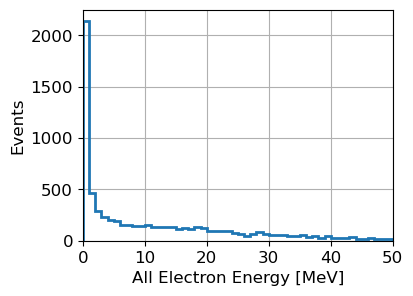

In [15]:
fig, ax = plt.subplots( figsize = (4, 3) )  

ax.hist(cosmic.eTotalE, bins = np.linspace(0, 50, 51), histtype = 'step', lw = 2)
ax.set_xlabel( r'All Electron Energy [MeV]', fontsize = 12 )
ax.set_ylabel( r'Events', fontsize = 12 )
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)
ax.set_xlim( [0, 50])

ax.grid(":")
fig.savefig('CosmicAlleTotalE.pdf')

In [16]:
cosmic[cosmic.eTotalE>50]

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
6,0,547,54.047305,15.435239,63.327678,123.099428,123.099428,644.217679,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.038476,0.003206,218.176630,0.0,0.0,0.0
11,1,308,53.370467,6.868363,22.759320,118.087122,118.087122,640.164566,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.045714,0.003206,321.885200,0.0,0.0,0.0
25,3,936,54.149803,8.751793,21.940344,100.788707,100.788707,539.011498,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.051878,0.003206,227.449740,0.0,0.0,0.0
38,6,47,223.466870,41.304277,177.331632,53.582266,53.582266,275.835189,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.160968,0.003206,419.585576,0.0,0.0,0.0
98,15,310,116.617386,46.965361,217.525940,112.508147,112.508147,612.018900,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.091082,0.003206,410.845177,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7299,987,582,178.445944,59.452386,265.347639,106.266531,106.266531,562.851274,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.125699,0.003206,509.276084,0.0,0.0,0.0
7316,990,692,105.327920,39.486849,161.039772,53.780535,53.780535,291.353370,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.061573,0.003206,216.942541,0.0,0.0,0.0
7337,993,564,363.999515,29.500380,139.627216,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.061193,0.040886,215.558802,0.336113,0.003252,402.455662,0.0,0.0,0.0
7340,993,863,53.139574,24.100923,98.649239,133.618718,133.618718,504.578135,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.048996,0.003206,239.504202,0.0,0.0,0.0


### Events with a muon track > 5cm

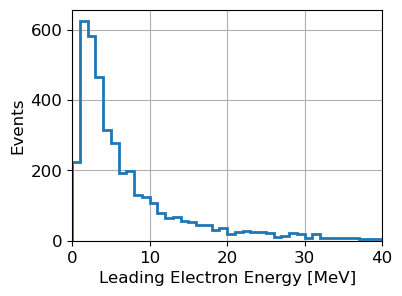

In [17]:
fig, ax = plt.subplots( figsize = (4, 3) )  

ax.hist(cosmic[cosmic.muMaxLength>50.].eMaxE, bins = np.linspace(0, 40, 41), histtype = 'step', lw = 2)
ax.set_xlabel( r'Leading Electron Energy [MeV]', fontsize = 12 )
ax.set_ylabel( r'Events', fontsize = 12 )
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)
ax.set_xlim( [0, 40])

ax.grid(":")
fig.savefig('CosmicMuonAndeMaxE.pdf')

In [18]:
cosmic[(cosmic.muMaxLength>50.)&(cosmic.eMaxE>40)]

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
38,6,47,223.466870,41.304277,177.331632,53.582266,53.582266,275.835189,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.160968,0.003206,419.585576,0.0,0.0,0.0
98,15,310,116.617386,46.965361,217.525940,112.508147,112.508147,612.018900,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.091082,0.003206,410.845177,0.0,0.0,0.0
282,37,847,69.364069,43.517075,184.004789,113.110919,113.110919,598.058219,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.035596,0.003206,179.411597,0.0,0.0,0.0
287,38,738,169.599588,74.151995,381.653016,115.518190,115.518190,618.796930,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.129806,0.003206,483.377088,0.0,0.0,0.0
298,40,77,147.837695,42.873684,189.587127,111.925503,111.925503,597.883786,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.107114,0.003206,352.848968,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6392,863,428,114.159371,40.675183,189.539153,37.996309,37.996309,202.168815,0.0,0.0,0.0,0.068282,0.068282,358.749155,0.100072,0.003230,352.752756,0.0,0.0,0.0
6774,919,987,144.132757,46.982069,225.812519,127.355375,127.355375,681.977928,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.095595,0.003206,369.888430,0.0,0.0,0.0
6882,933,613,220.150314,44.952886,207.470811,132.841346,132.841346,690.272764,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.187003,0.003206,434.080208,0.0,0.0,0.0
7162,971,867,113.686110,53.318431,258.956300,84.393148,84.393148,455.555844,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.101028,0.003206,225.857672,0.0,0.0,0.0


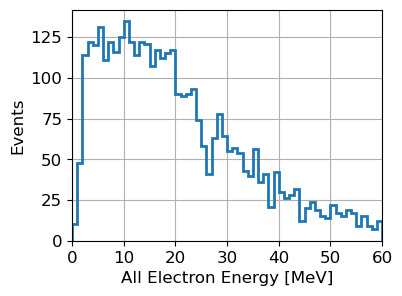

In [19]:
fig, ax = plt.subplots( figsize = (4, 3) )  

ax.hist(cosmic[cosmic.muMaxLength>50.].eTotalE, bins = np.linspace(0, 60, 61), histtype = 'step', lw = 2)
ax.set_xlabel( r'All Electron Energy [MeV]', fontsize = 12 )
ax.set_ylabel( r'Events', fontsize = 12 )
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)
ax.set_xlim( [0, 60])

ax.grid(":")
fig.savefig('CosmicMuonAndeTotalE.pdf')

In [20]:
cosmic[(cosmic.muMaxLength>50.)&(cosmic.eTotalE>60.)]

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
38,6,47,223.466870,41.304277,177.331632,53.582266,53.582266,275.835189,0.0,0.0,0.0,0.0,0.0,0.0,0.160968,0.003206,419.585576,0.0,0.0,0.0
98,15,310,116.617386,46.965361,217.525940,112.508147,112.508147,612.018900,0.0,0.0,0.0,0.0,0.0,0.0,0.091082,0.003206,410.845177,0.0,0.0,0.0
99,15,564,144.590177,35.037870,176.065269,132.468339,132.468339,727.700779,0.0,0.0,0.0,0.0,0.0,0.0,0.119688,0.003223,382.216890,0.0,0.0,0.0
114,17,351,72.311320,31.295302,120.272511,114.493885,114.493885,608.676600,0.0,0.0,0.0,0.0,0.0,0.0,0.041932,0.003206,278.402095,0.0,0.0,0.0
158,22,219,131.241854,26.904504,116.076817,76.356923,76.356923,421.369965,0.0,0.0,0.0,0.0,0.0,0.0,0.113526,0.003206,529.180726,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7214,977,510,60.572219,13.695395,51.793695,95.940944,95.940944,529.117593,0.0,0.0,0.0,0.0,0.0,0.0,0.051627,0.003206,348.939687,0.0,0.0,0.0
7223,978,540,77.475266,21.004065,86.229132,102.832076,102.832076,546.257041,0.0,0.0,0.0,0.0,0.0,0.0,0.065090,0.003263,217.425234,0.0,0.0,0.0
7276,985,331,66.995602,25.119025,97.996103,107.846850,107.846850,565.978424,0.0,0.0,0.0,0.0,0.0,0.0,0.038802,0.003206,289.826065,0.0,0.0,0.0
7299,987,582,178.445944,59.452386,265.347639,106.266531,106.266531,562.851274,0.0,0.0,0.0,0.0,0.0,0.0,0.125699,0.003206,509.276084,0.0,0.0,0.0


### Events without a muon track > 5cm

In [21]:
cosmic[cosmic.muMaxLength<50.].eMaxE.max()

61.293474444562065

In [22]:
cosmic[cosmic.muMaxLength<50.].eTotalE.max()

363.9995148757801

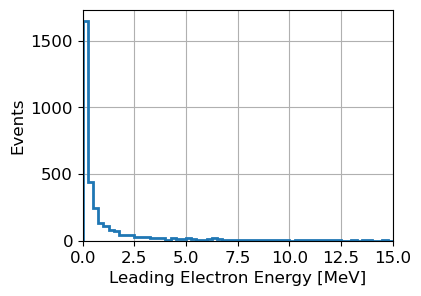

In [23]:
fig, ax = plt.subplots( figsize = (4, 3) )  

ax.hist(cosmic[cosmic.muMaxLength<50.].eMaxE, bins = np.linspace(0, 15, 61), histtype = 'step', lw = 2)
ax.set_xlabel( r'Leading Electron Energy [MeV]', fontsize = 12 )
ax.set_ylabel( r'Events', fontsize = 12 )
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)
ax.set_xlim( [0, 15])

ax.grid(":")
fig.savefig('CosmicNoMuonAndeMaxE.pdf')

In [24]:
cosmic[(cosmic.muMaxLength<50.)&(cosmic.eMaxE>15.)]

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
164,22,783,43.496447,26.560224,121.481292,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.093962,0.003206,250.329313,0.0,0.0,0.0
210,28,432,38.164354,18.957370,87.699331,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.042988,0.003206,544.464941,0.0,0.0,0.0
340,46,702,28.053821,20.793543,85.735164,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.019238,0.003206,328.842415,0.0,0.0,0.0
377,50,855,59.157275,29.920261,126.958870,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.061170,0.003206,343.408536,0.0,0.0,0.0
488,65,234,32.148781,17.125017,69.284769,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.019238,0.003206,235.190374,0.0,0.0,0.0
836,112,92,25.658395,19.757517,98.100392,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.028857,0.003206,113.806875,0.0,0.0,0.0
838,112,274,30.598478,20.609899,94.887262,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.051627,0.003206,257.028437,0.0,0.0,0.0
1175,154,819,223.225605,26.913707,129.458483,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.203956,0.003206,570.727314,0.0,0.0,0.0
1252,164,649,39.809050,19.745161,78.737872,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.022444,0.003206,422.127338,0.0,0.0,0.0
1290,169,377,85.758897,24.234120,110.935079,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.064808,0.003206,471.717445,0.0,0.0,0.0


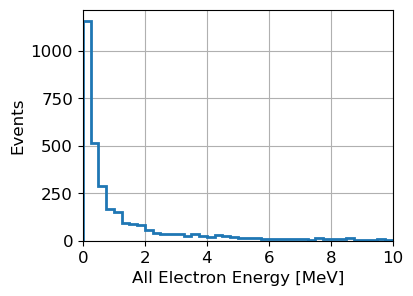

In [25]:
fig, ax = plt.subplots( figsize = (4, 3) )  

ax.hist(cosmic[cosmic.muMaxLength<50.].eTotalE, bins = np.linspace(0, 10, 41), histtype = 'step', lw = 2)
ax.set_xlabel( r'All Electron Energy [MeV]', fontsize = 12 )
ax.set_ylabel( r'Events', fontsize = 12 )
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)
ax.set_xlim( [0, 10])

ax.grid(":")
fig.savefig('CosmicNoMuonAndeTotalE.pdf')

In [26]:
cosmic[(cosmic.muMaxLength<50.)&(cosmic.eTotalE>10.)]

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
42,6,919,20.439074,8.804762,35.750278,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.009619,0.003206,361.447522,0.0,0.0,0.0
57,10,421,14.904772,4.401985,19.497695,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.013152,0.003206,139.568307,0.0,0.0,0.0
111,16,743,51.395144,6.293859,20.375879,9.040309,9.040309,43.802232,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.035518,0.003206,305.070253,0.0,0.0,0.0
164,22,783,43.496447,26.560224,121.481292,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.093962,0.003206,250.329313,0.0,0.0,0.0
180,24,832,36.808105,8.487818,39.251367,2.823456,2.823456,0.755201,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.030007,0.003206,432.570569,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7052,955,247,15.757846,12.930576,54.895427,5.194942,5.194942,27.185837,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.003206,0.003206,136.247188,0.0,0.0,0.0
7187,974,215,21.752961,3.812733,11.895342,8.307352,8.307352,42.479289,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.028857,0.003206,286.205613,0.0,0.0,0.0
7192,974,958,22.292646,14.387439,37.201946,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.013152,0.003206,101.167752,0.0,0.0,0.0
7337,993,564,363.999515,29.500380,139.627216,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.061193,0.040886,215.558802,0.336113,0.003252,402.455662,0.0,0.0,0.0


In [27]:
cosmic[(cosmic.muMaxLength<50.)&(cosmic.eMaxE>5.)]

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
42,6,919,20.439074,8.804762,35.750278,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.009619,0.003206,361.447522,0.0,0.0,0.0
111,16,743,51.395144,6.293859,20.375879,9.040309,9.040309,43.802232,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.035518,0.003206,305.070253,0.0,0.0,0.0
164,22,783,43.496447,26.560224,121.481292,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.093962,0.003206,250.329313,0.0,0.0,0.0
180,24,832,36.808105,8.487818,39.251367,2.823456,2.823456,0.755201,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.030007,0.003206,432.570569,0.0,0.0,0.0
189,26,410,6.387012,5.988169,17.033896,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.006413,0.003206,144.150317,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7192,974,958,22.292646,14.387439,37.201946,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.013152,0.003206,101.167752,0.0,0.0,0.0
7257,983,211,9.611965,8.080513,28.909665,4.852547,4.852547,25.017461,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.006413,0.003206,8.178471,0.0,0.0,0.0
7337,993,564,363.999515,29.500380,139.627216,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.061193,0.040886,215.558802,0.336113,0.003252,402.455662,0.0,0.0,0.0
7346,994,892,9.402336,8.721175,33.260367,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.003206,0.003206,39.543775,0.0,0.0,0.0


### Events with charged pions

In [28]:
cosmic[cosmic.piMaxE>0.]

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
4357,582,353,14.233415,2.438053,3.649882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000327,0.000327,30.904215,69.433682,69.433682,377.312744


### Events with protons

In [29]:
cosmic[cosmic.pMaxE>0.]

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
333,45,726,17.823230,4.089104,13.130432,133.068955,133.068955,491.485294,5.604414,5.604414,0.502378,0.249841,0.249841,246.933459,0.029150,0.003206,394.085694,0.0,0.0,0.0
342,46,804,23.924415,4.701756,19.200745,144.549130,144.549130,551.938666,2.744068,2.744068,0.153415,0.283771,0.087404,383.586874,0.028886,0.003206,257.607067,0.0,0.0,0.0
425,57,523,19.779873,2.640454,5.838027,160.717863,160.717863,642.338484,23.218298,23.218298,5.957375,0.400592,0.263291,424.104002,0.016871,0.003206,193.037602,0.0,0.0,0.0
944,125,293,18.441107,1.790813,4.490595,120.468519,120.468519,426.617787,3.864147,3.864147,0.272361,0.000000,0.000000,204.828421,0.013152,0.003206,249.232205,0.0,0.0,0.0
1219,160,983,12.730207,1.733412,3.870694,96.865314,96.865314,316.931459,2.617079,2.617079,0.140731,0.000000,0.000000,96.095456,0.022693,0.003206,417.243409,0.0,0.0,0.0
1339,175,266,11.958955,1.563845,3.740276,146.139293,146.139293,555.359508,7.001479,7.001479,0.746684,0.005136,0.005136,19.569619,0.023097,0.003206,531.816208,0.0,0.0,0.0
1657,217,831,5.347654,2.784501,6.824141,0.000000,0.000000,0.000000,6.185129,6.185129,0.596519,0.082217,0.082217,242.878146,0.012854,0.003206,282.728264,0.0,0.0,0.0
1971,258,240,3.259795,0.710715,0.902188,68.908831,68.908831,184.238320,12.704163,12.704163,2.063468,0.181594,0.111175,252.815325,0.013322,0.003206,329.829954,0.0,0.0,0.0
2216,291,719,6.491758,0.587773,0.689856,52.379212,52.379212,124.674426,23.652322,23.652322,6.187467,0.074960,0.039025,490.327726,0.029183,0.003206,151.241689,0.0,0.0,0.0
2421,323,418,4.462863,2.247591,5.224125,7.575285,7.575285,4.157419,34.452664,34.452664,11.879742,0.119507,0.086863,646.687715,0.012825,0.003206,348.753041,0.0,0.0,0.0


### Events with neutrons

In [30]:
cosmic[cosmic.nMaxE>0.]

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
28,4,211,15.645702,3.344368,9.594857,150.659590,150.659590,676.044103,0.000000,0.000000,0.000000,0.089153,0.089153,261.486740,0.009619,0.003206,21.468163,0.0,0.0,0.0
247,34,458,8.094022,1.269424,2.350303,74.345252,74.345252,321.985525,0.000000,0.000000,0.000000,0.153223,0.153223,600.437169,0.003206,0.003206,399.913969,0.0,0.0,0.0
311,41,736,0.389909,0.110993,0.047778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.149926,0.149926,63.469375,0.006413,0.003206,161.198858,0.0,0.0,0.0
333,45,726,17.823230,4.089104,13.130432,133.068955,133.068955,491.485294,5.604414,5.604414,0.502378,0.249841,0.249841,246.933459,0.029150,0.003206,394.085694,0.0,0.0,0.0
342,46,804,23.924415,4.701756,19.200745,144.549130,144.549130,551.938666,2.744068,2.744068,0.153415,0.283771,0.087404,383.586874,0.028886,0.003206,257.607067,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7182,973,729,9.447018,1.234073,1.891931,82.089309,82.089309,248.577334,0.000000,0.000000,0.000000,0.089745,0.089745,294.107085,0.019238,0.003206,306.956758,0.0,0.0,0.0
7248,982,819,2.818505,0.872993,1.136038,24.406988,24.406988,33.777213,0.000000,0.000000,0.000000,0.372799,0.123596,558.699550,0.013152,0.003206,816.423952,0.0,0.0,0.0
7250,982,849,0.073897,0.073897,0.023763,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166837,0.166837,248.204543,0.000000,0.000000,0.000000,0.0,0.0,0.0
7318,990,811,0.246835,0.122100,0.056157,18.778639,18.778639,21.503389,5.569875,5.569875,0.487315,0.061220,0.061220,39.748342,0.000000,0.000000,50.261425,0.0,0.0,0.0


In [31]:
cosmic[cosmic.nMaxE>0.].nTotalE.max()

0.6521259966903017

### Events with gammas

In [32]:
cosmic[cosmic.gMaxE>0.]

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
1,0,229,9.060710,2.495953,5.956722,62.362895,62.362895,343.563160,0.0,0.0,0.0,0.0,0.0,0.0,0.009619,0.003206,27.355899,0.0,0.0,0.0
2,0,238,14.324911,2.517551,8.184814,50.643010,50.643010,285.520670,0.0,0.0,0.0,0.0,0.0,0.0,0.006739,0.003206,12.855388,0.0,0.0,0.0
3,0,331,0.159523,0.127416,0.060342,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000327,0.000327,37.706869,0.0,0.0,0.0
4,0,384,0.507793,0.266854,0.201996,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.003206,0.003206,23.384922,0.0,0.0,0.0
5,0,509,0.228477,0.105125,0.043559,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.003206,0.003206,98.947220,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7367,997,737,12.001098,3.426128,7.539809,33.004714,33.004714,176.367225,0.0,0.0,0.0,0.0,0.0,0.0,0.006442,0.003206,0.238057,0.0,0.0,0.0
7368,997,933,1.991142,1.694014,2.941866,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.003206,0.003206,114.766754,0.0,0.0,0.0
7370,998,732,13.572289,2.513901,6.757480,117.146117,117.146117,632.300393,0.0,0.0,0.0,0.0,0.0,0.0,0.006413,0.003206,265.301447,0.0,0.0,0.0
7372,999,270,0.279450,0.116976,0.052229,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.003206,0.003206,7.693221,0.0,0.0,0.0


In [33]:
cosmic[cosmic.gMaxE>0.].gTotalE.max()

0.5551214525608658

## $\nu_e$-Ar Charged-Current Interaction

In [34]:
sigFile = '/Users/yuntse/data/coherent/preLArTPC/analysis/evt/nueArCCSignalEvt.csv'
signal = pd.read_csv( sigFile )

In [35]:
signal

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
0,0,0,29.762772,25.711656,117.495261,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.006413,0.003206,235.745103,0.0,0.0,0.0
1,0,1,18.126617,16.115067,60.351042,0.0,0.0,0.0,0.0,0.0,0.0,0.042025,0.042025,389.878526,0.016059,0.003233,189.450380,0.0,0.0,0.0
2,0,2,28.335429,19.853539,102.403385,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.019238,0.003206,504.354918,0.0,0.0,0.0
3,0,3,16.780716,9.451271,37.906906,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.016032,0.003206,359.042256,0.0,0.0,0.0
4,0,4,43.111658,24.199871,107.316206,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.028857,0.003206,446.720450,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,9,9995,34.303758,21.503826,77.408105,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.032390,0.003206,367.575314,0.0,0.0,0.0
99996,9,9996,23.077273,17.209821,68.501779,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,145.714206,0.019238,0.003206,529.269536,0.0,0.0,0.0
99997,9,9997,28.902986,20.977730,92.537329,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.020217,0.003206,354.643869,0.0,0.0,0.0
99998,9,9998,37.702996,29.801545,134.461512,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.035354,0.003291,366.556984,0.0,0.0,0.0


In [36]:
signal.eMaxE.max()

42.89953125530226

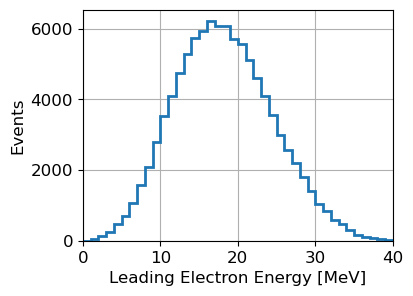

In [37]:
fig, ax = plt.subplots( figsize = (4, 3) )  

ax.hist(signal.eMaxE, bins = np.linspace(0, 40, 41), histtype = 'step', lw = 2)
ax.set_xlabel( r'Leading Electron Energy [MeV]', fontsize = 12 )
ax.set_ylabel( r'Events', fontsize = 12 )
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)
ax.set_xlim( [0, 40])

ax.grid(":")

In [38]:
signal[signal.eMaxE<1]

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
10045,1,45,1.642046,0.841876,1.188845,0.0,0.0,0.0,7.109837,7.109837,0.746332,0.000000,0.000000,0.000000,0.003206,0.003206,496.720092,0.0,0.0,0.0
33496,3,3496,1.073101,0.505571,1.122813,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006413,0.003206,147.690910,0.0,0.0,0.0
72383,7,2383,2.807169,0.979939,1.545763,0.0,0.0,0.0,10.503064,10.503064,1.501339,0.000000,0.000000,0.000000,0.000000,0.000000,372.435248,0.0,0.0,0.0
76351,7,6351,2.724044,0.937078,2.180831,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006739,0.003206,144.886426,0.0,0.0,0.0
80948,8,948,0.876263,0.876263,4.274142,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.077348,0.077348,366.434509,0.000000,0.000000,253.760912,0.0,0.0,0.0


In [39]:
signal.eMaxLength.max()

198.668795318732

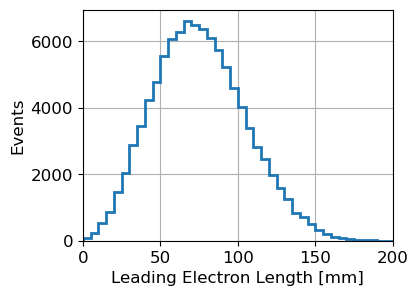

In [40]:
fig, ax = plt.subplots( figsize = (4, 3) )  

ax.hist(signal.eMaxLength, bins = np.linspace(0, 200, 41), histtype = 'step', lw = 2)
ax.set_xlabel( r'Leading Electron Length [mm]', fontsize = 12 )
ax.set_ylabel( r'Events', fontsize = 12 )
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)
ax.set_xlim( [0, 200])

ax.grid(":")

In [41]:
signal[signal.pMaxE>0.]

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
15,0,15,31.186034,17.003950,75.983953,0.0,0.0,0.0,5.377986,5.377986,0.480866,0.0,0.0,0.0,0.038505,0.003206,358.517053,0.0,0.0,0.0
21,0,21,26.403024,22.661828,94.051909,0.0,0.0,0.0,7.319425,7.319425,0.786158,0.0,0.0,0.0,0.022444,0.003206,479.068129,0.0,0.0,0.0
23,0,23,22.057759,14.290224,61.927453,0.0,0.0,0.0,2.985427,2.985427,0.176274,0.0,0.0,0.0,0.029510,0.003206,181.802742,0.0,0.0,0.0
24,0,24,26.789516,19.622645,81.606450,0.0,0.0,0.0,7.798727,7.798727,0.867222,0.0,0.0,0.0,0.029568,0.003206,336.065522,0.0,0.0,0.0
35,0,35,21.484495,15.130450,51.845657,0.0,0.0,0.0,3.692284,3.692284,0.246328,0.0,0.0,0.0,0.019564,0.003206,471.943760,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99965,9,9965,17.795536,13.650192,58.223068,0.0,0.0,0.0,2.713864,2.713864,0.151136,0.0,0.0,0.0,0.016282,0.003206,467.775153,0.0,0.0,0.0
99968,9,9968,25.810485,21.569043,95.923500,0.0,0.0,0.0,10.559758,10.559758,1.501568,0.0,0.0,0.0,0.013152,0.003206,229.790266,0.0,0.0,0.0
99974,9,9974,24.531005,17.984436,69.556825,0.0,0.0,0.0,4.578730,4.578730,0.353825,0.0,0.0,0.0,0.032063,0.003206,298.319431,0.0,0.0,0.0
99981,9,9981,23.557982,17.380046,66.503454,0.0,0.0,0.0,3.455663,3.455663,0.222310,0.0,0.0,0.0,0.006413,0.003206,97.612329,0.0,0.0,0.0


8521 out of 100k (1e5) events have a proton.  0.085%.

## $\nu_e$-Ar Charged-Current Interaction outside the Fiducial Volume

In [42]:
dirtFile = '/Users/yuntse/data/coherent/preLArTPC/analysis/evt/nueArCCoutFiducialEvt.csv'
dirt = pd.read_csv( dirtFile )

In [43]:
dirt

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
0,0,0,31.698334,26.120365,101.181203,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,11.213825,0.019238,0.003206,580.762308,0.0,0.0,0.0
1,0,1,0.603692,0.169704,0.097265,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.006413,0.003206,79.145001,0.0,0.0,0.0
2,0,3,0.334206,0.179518,0.106676,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.003206,0.003206,80.878620,0.0,0.0,0.0
3,0,4,45.106566,13.135839,60.447430,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.032063,0.003206,397.961905,0.0,0.0,0.0
4,0,6,0.302493,0.157988,0.086427,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.003206,0.003206,181.096305,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225913,39,9991,1.582253,0.229301,0.158643,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.009619,0.003206,203.254428,0.0,0.0,0.0
225914,39,9992,9.670898,6.443123,33.387051,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000356,0.000327,135.372170,0.0,0.0,0.0
225915,39,9994,2.544896,0.689875,0.967853,0.0,0.0,0.0,0.0,0.0,0.0,0.026448,0.026448,93.360800,0.012889,0.003270,366.964919,0.0,0.0,0.0
225916,39,9996,2.870564,2.082478,4.749207,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.006445,0.003238,87.183566,0.0,0.0,0.0


In [44]:
dirt.eMaxE.max()

42.49747897790009

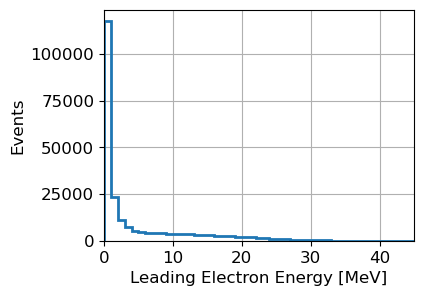

In [45]:
fig, ax = plt.subplots( figsize = (4, 3) )  

ax.hist(dirt.eMaxE, bins = np.linspace(0, 45, 46), histtype = 'step', lw = 2)
ax.set_xlabel( r'Leading Electron Energy [MeV]', fontsize = 12 )
ax.set_ylabel( r'Events', fontsize = 12 )
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)
ax.set_xlim( [0, 45])

ax.grid(":")

In [46]:
dirt.muMaxE.max(), dirt.pMaxE.max(), dirt.nMaxE.max(), dirt.gMaxE.max(), dirt.piMaxE.max()

(0.0, 14.1313190920099, 0.7071333952699206, 0.0033722311858, 0.0)

## Scale of Each Sample

### Mass of the LAr outside the fiducial volume

V = &pi;r<sup>2</sup>h - 50x40x50, \
where r = 46cm, h = 120cm. \
LAr density = 1.39 g/cm<sup>3</sup> \
Expect 55.9 $\nu_e$-Ar CC interactions in 66.72 kg of LAr

In [47]:
r = 46
h = 120
# unit: cm^2
Vout = np.pi*(46.**2)*120 - 50*40*50
# unit: kg, so divided by 1000
Mout = 1.39*Vout/1000.
Mout

969.8213571733331

In [48]:
nExpOut = 55.9/66.72*Mout
nExpOut

812.545171852358

### Scales of each samples

|        |  Expected number of events per year | Generated number of events | Scale |
|--------|-------------------------------------|----------------------------|-------|
| Cosmics | 1.08e9 | 1e6 | 1080 |
| $\nu_e$-Ar CC signal | 116.5 | 1e5 | 116.5/1e5 |
| $\nu_e$-Ar CC out fiducial | 813 | 4e5 | 813/4e5 |

In [49]:
fCosmic = 1080.
fNueSignal = 116.5/1e5
fNueOutFiducial = 813./4e5
fNueSignal, fNueOutFiducial

(0.001165, 0.0020325)

In [50]:
cosmicNoMuon = cosmic[cosmic.muMaxLength<50.]

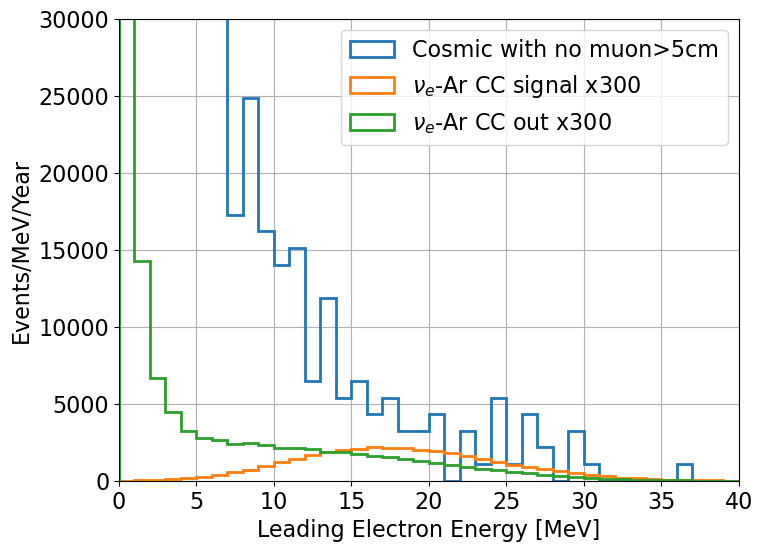

In [51]:
fig, ax = plt.subplots( figsize = (8, 6) )

ax.hist(cosmicNoMuon.eMaxE, weights = np.full_like(cosmicNoMuon.eMaxE, fCosmic), bins = np.linspace(0, 40, 41),
        histtype = 'step', lw = 2, label = 'Cosmic with no muon>5cm')
ax.hist(signal.eMaxE, weights = np.full_like(signal.eMaxE, fNueSignal*300), bins = np.linspace(0, 40, 41),
        histtype = 'step', lw = 2, label = r'$\nu_e$-Ar CC signal x300')
ax.hist(dirt.eMaxE, weights = np.full_like(dirt.eMaxE, fNueOutFiducial*300), bins = np.linspace(0, 40, 41), 
        histtype = 'step', lw = 2, label = r'$\nu_e$-Ar CC out x300')
ax.set_xlabel( r'Leading Electron Energy [MeV]', fontsize = 16 )
ax.set_ylabel( r'Events/MeV/Year', fontsize = 16 )
ax.tick_params(axis = 'x', labelsize = 16)
ax.tick_params(axis = 'y', labelsize = 16)
ax.set_xlim( [0, 40])
ax.set_ylim( [0, 30000])
ax.legend( fontsize = 16)

ax.grid(":")
fig.savefig('LeadingEEx300.pdf')

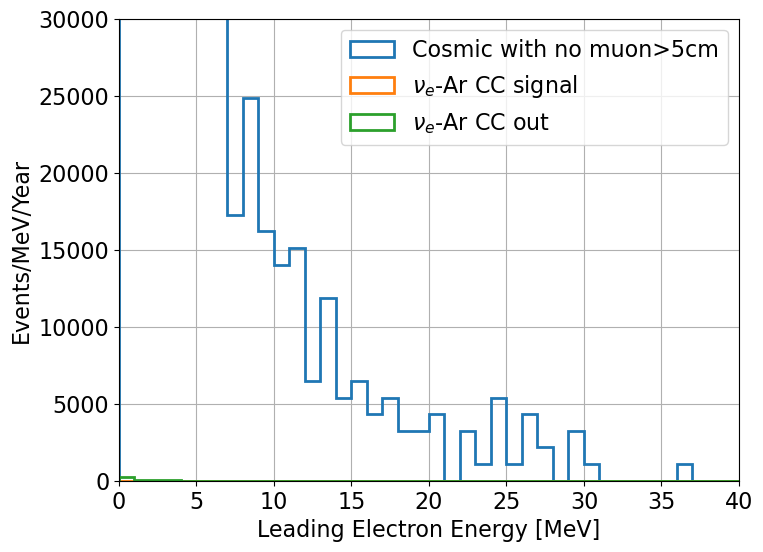

In [52]:
fig, ax = plt.subplots( figsize = (8, 6) )

ax.hist(cosmicNoMuon.eMaxE, weights = np.full_like(cosmicNoMuon.eMaxE, fCosmic), bins = np.linspace(0, 40, 41),
        histtype = 'step', lw = 2, label = 'Cosmic with no muon>5cm')
ax.hist(signal.eMaxE, weights = np.full_like(signal.eMaxE, fNueSignal), bins = np.linspace(0, 40, 41),
        histtype = 'step', lw = 2, label = r'$\nu_e$-Ar CC signal')
ax.hist(dirt.eMaxE, weights = np.full_like(dirt.eMaxE, fNueOutFiducial), bins = np.linspace(0, 40, 41), 
        histtype = 'step', lw = 2, label = r'$\nu_e$-Ar CC out')
ax.set_xlabel( r'Leading Electron Energy [MeV]', fontsize = 16 )
ax.set_ylabel( r'Events/MeV/Year', fontsize = 16 )
ax.tick_params(axis = 'x', labelsize = 16)
ax.tick_params(axis = 'y', labelsize = 16)
ax.set_xlim( [0, 40])
ax.set_ylim( [0, 30000])
ax.legend( fontsize = 16)

ax.grid(":")
fig.savefig('LeadingEE.pdf')

In [53]:
120000*fNueOutFiducial

243.9

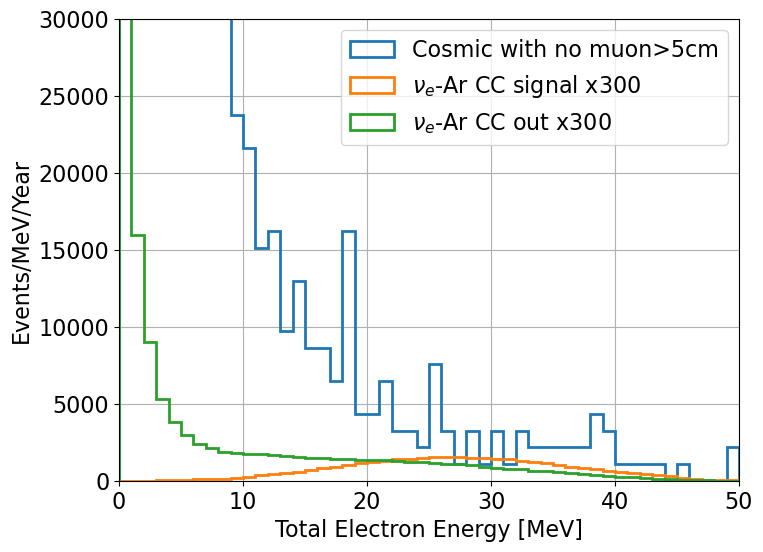

In [54]:
fig, ax = plt.subplots( figsize = (8, 6) )

ax.hist(cosmicNoMuon.eTotalE, weights = np.full_like(cosmicNoMuon.eTotalE, fCosmic), bins = np.linspace(0, 50, 51),
        histtype = 'step', lw = 2, label = 'Cosmic with no muon>5cm')
ax.hist(signal.eTotalE, weights = np.full_like(signal.eTotalE, fNueSignal*300), bins = np.linspace(0, 50, 51),
        histtype = 'step', lw = 2, label = r'$\nu_e$-Ar CC signal x300')
ax.hist(dirt.eTotalE, weights = np.full_like(dirt.eTotalE, fNueOutFiducial*300), bins = np.linspace(0, 50, 51), 
        histtype = 'step', lw = 2, label = r'$\nu_e$-Ar CC out x300')
ax.set_xlabel( r'Total Electron Energy [MeV]', fontsize = 16 )
ax.set_ylabel( r'Events/MeV/Year', fontsize = 16 )
ax.tick_params(axis = 'x', labelsize = 16)
ax.tick_params(axis = 'y', labelsize = 16)
ax.set_xlim( [0, 50])
ax.set_ylim( [0, 30000])
ax.legend( fontsize = 16)

ax.grid(":")
fig.savefig('TotalEEx300.pdf')

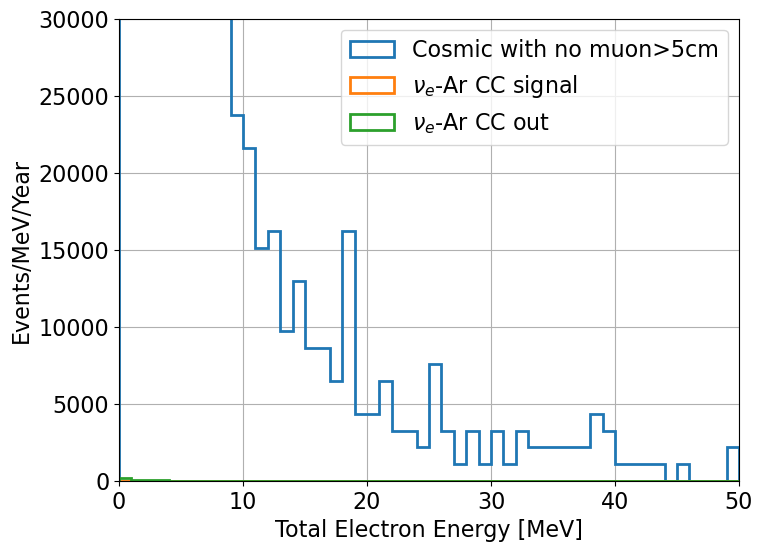

In [65]:
fig, ax = plt.subplots( figsize = (8, 6) )

ax.hist(cosmicNoMuon.eTotalE, weights = np.full_like(cosmicNoMuon.eTotalE, fCosmic), bins = np.linspace(0, 50, 51),
        histtype = 'step', lw = 2, label = 'Cosmic with no muon>5cm')
ax.hist(signal.eTotalE, weights = np.full_like(signal.eTotalE, fNueSignal), bins = np.linspace(0, 50, 51),
        histtype = 'step', lw = 2, label = r'$\nu_e$-Ar CC signal')
ax.hist(dirt.eTotalE, weights = np.full_like(dirt.eTotalE, fNueOutFiducial), bins = np.linspace(0, 50, 51), 
        histtype = 'step', lw = 2, label = r'$\nu_e$-Ar CC out')
ax.set_xlabel( r'Total Electron Energy [MeV]', fontsize = 16 )
ax.set_ylabel( r'Events/MeV/Year', fontsize = 16 )
ax.tick_params(axis = 'x', labelsize = 16)
ax.tick_params(axis = 'y', labelsize = 16)
ax.set_xlim( [0, 50])
ax.set_ylim( [0, 30000])
ax.legend( fontsize = 16)

ax.grid(":")
fig.savefig('TotalEE.pdf')

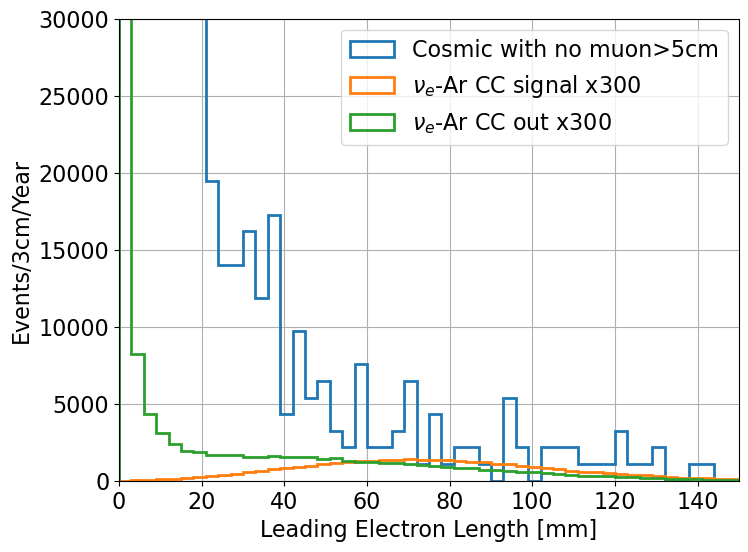

In [55]:
fig, ax = plt.subplots( figsize = (8, 6) )

ax.hist(cosmicNoMuon.eMaxLength, weights = np.full_like(cosmicNoMuon.eMaxLength, fCosmic), 
        bins = np.linspace(0, 150, 51),
        histtype = 'step', lw = 2, label = 'Cosmic with no muon>5cm')
ax.hist(signal.eMaxLength, weights = np.full_like(signal.eMaxLength, fNueSignal*300), 
        bins = np.linspace(0, 150, 51),
        histtype = 'step', lw = 2, label = r'$\nu_e$-Ar CC signal x300')
ax.hist(dirt.eMaxLength, weights = np.full_like(dirt.eMaxLength, fNueOutFiducial*300), 
        bins = np.linspace(0, 150, 51), 
        histtype = 'step', lw = 2, label = r'$\nu_e$-Ar CC out x300')
ax.set_xlabel( r'Leading Electron Length [mm]', fontsize = 16 )
ax.set_ylabel( r'Events/3cm/Year', fontsize = 16 )
ax.tick_params(axis = 'x', labelsize = 16)
ax.tick_params(axis = 'y', labelsize = 16)
ax.set_xlim( [0, 150])
ax.set_ylim( [0, 30000])
ax.legend( fontsize = 16)

ax.grid(":")
fig.savefig('LeadingELx300.pdf')

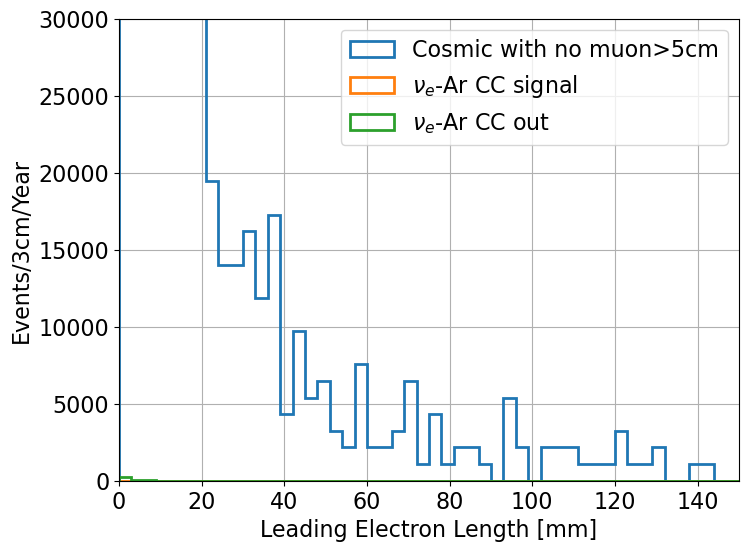

In [56]:
fig, ax = plt.subplots( figsize = (8, 6) )

ax.hist(cosmicNoMuon.eMaxLength, weights = np.full_like(cosmicNoMuon.eMaxLength, fCosmic), 
        bins = np.linspace(0, 150, 51),
        histtype = 'step', lw = 2, label = 'Cosmic with no muon>5cm')
ax.hist(signal.eMaxLength, weights = np.full_like(signal.eMaxLength, fNueSignal), 
        bins = np.linspace(0, 150, 51),
        histtype = 'step', lw = 2, label = r'$\nu_e$-Ar CC signal')
ax.hist(dirt.eMaxLength, weights = np.full_like(dirt.eMaxLength, fNueOutFiducial), 
        bins = np.linspace(0, 150, 51), 
        histtype = 'step', lw = 2, label = r'$\nu_e$-Ar CC out')
ax.set_xlabel( r'Leading Electron Length [mm]', fontsize = 16 )
ax.set_ylabel( r'Events/3cm/Year', fontsize = 16 )
ax.tick_params(axis = 'x', labelsize = 16)
ax.tick_params(axis = 'y', labelsize = 16)
ax.set_xlim( [0, 150])
ax.set_ylim( [0, 30000])
ax.legend( fontsize = 16)

ax.grid(":")
fig.savefig('LeadingEL.pdf')